In [1]:
Threads.nthreads()

16

In [2]:
using Plots
using DSP
using FFTW

In [3]:
include("radarsim.jl")
using .radarsim;

In [4]:
samp_rate = 5e6  #hz
prf = 100 #Hz
duty_factor = .15; #.05
β = 1e6; #Pulse Bandwidth
repetitions = 128;
fc = 900_000_000; #Hz

Gt = 40; #dB
Gr = 45; #dB
system_loss = 6; #dB

targets = [Target(560_094, 0), Target(800_000, 0)]
num_targets = length(targets);

In [5]:
τ = duty_factor * (1/prf);
λ = (1/fc) * c;

In [6]:
(1/prf * c / 2) / 1000 #Maximum Range KM

1498.96229

In [7]:
(τ * c / 2) / 1000 #Minimum Range KM

224.8443435

In [8]:
t, pulse_train = gen_pulse_train(repetitions, samp_rate, prf, τ, β, envelope_type="HalfSin");

In [9]:
prt = 1/prf;
t = 1/samp_rate:1/samp_rate:prt;
a = zeros(length(t));


In [10]:
a[1:round(Int, τ * samp_rate )] = sin.(1/(τ/pi).*t[1:round(Int, τ * samp_rate )]);

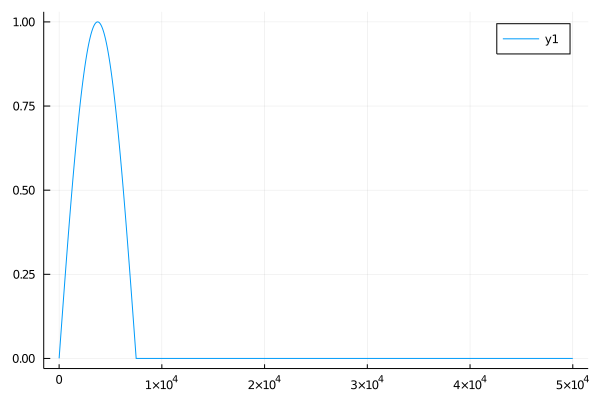

In [11]:
plot(a)

In [12]:
rx_pulse_train = sim_return(samp_rate, pulse_train, targets, fc=fc, system_loss=system_loss, Gt=Gt, Gr=Gr, SNR=-12);

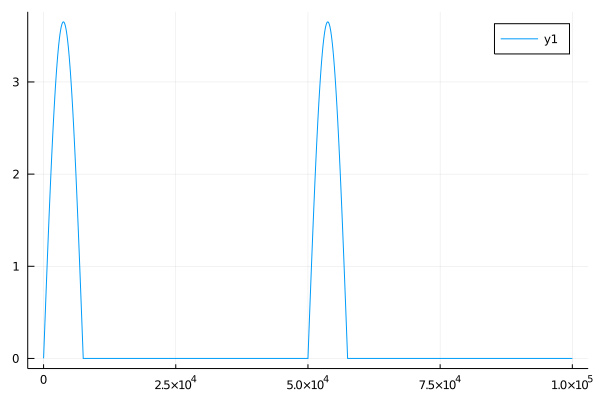

In [13]:
plot(abs.(pulse_train[1:Int(1e5)]))

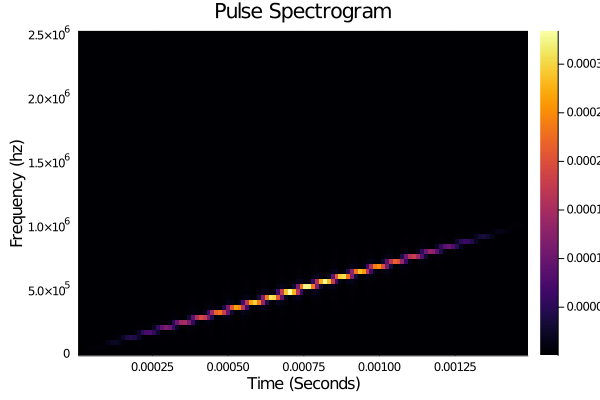

In [14]:
fft_size = 128;
spec = spectrogram(pulse_train[begin:round(Int, τ*samp_rate)], fft_size; fs=samp_rate); #+ pulse_train

heatmap(spec.time, LinRange(0,samp_rate/2, round(Int, fft_size/2)), spec.power[begin:round(Int, fft_size/2) , :], xguide="Time (Seconds)", yguide="Frequency (hz)", title="Pulse Spectrogram")

In [15]:
null, p = single_pulse(samp_rate, prf, τ, β);
pulse_compression = conv(rx_pulse_train, reverse(p[begin:round(Int, τ*samp_rate)]));

In [16]:
pulse_compression = pulse_compression[1:length(rx_pulse_train)];


In [17]:
len = Int(1/prf * samp_rate);
range_stacked = reshape(pulse_compression, len, repetitions);


In [18]:
#heatmap(abs.(range_stacked))

In [20]:
range_doppler = fft((range_stacked), (2,));


In [21]:
range_doppler

50000×128 Array{Complex{Float64},2}:
 -6.56484e-17-7.67602e-16im  …   4.31211e-17-1.43355e-16im
  1.58266e-16-1.05208e-15im     -2.59418e-17-2.13232e-16im
  1.54797e-16-8.89757e-16im     -1.22815e-16-1.93944e-16im
  9.20217e-18-5.90392e-16im     -1.70556e-16-9.68056e-17im
 -6.53977e-17-5.12875e-16im     -1.48978e-16-2.52928e-17im
  8.91079e-17-6.05385e-16im  …  -1.26449e-16-5.66328e-18im
  3.73569e-16-4.94362e-16im     -1.41985e-16+2.22374e-17im
  4.73424e-16+7.03478e-17im     -1.32484e-16+9.83119e-17im
  1.11964e-16+7.68787e-16im     -5.43743e-17+1.67028e-16im
 -5.69518e-16+9.57032e-16im      5.95116e-17+1.4529e-16im
             ⋮               ⋱  
  5.69504e-16+2.04707e-15im     -1.21346e-17-1.44547e-16im
 -1.19032e-16+1.75027e-15im     -9.22463e-17-5.65779e-17im
 -4.57774e-16+9.2125e-16im      -6.67285e-17+3.16831e-17im
 -5.15796e-16+9.42578e-17im      3.04739e-17+3.57448e-17im
 -5.15199e-16-2.50247e-16im  …   9.07165e-17-4.91447e-17im
 -6.07614e-16-6.72443e-17im      6.11828e-17-1

In [22]:

# for i in 1:length(range_doppler[1,:])
#     range_doppler[i,:] = fftshift(range_doppler[i,:]);
# end

In [23]:
range_doppler

50000×128 Array{Complex{Float64},2}:
 -6.56484e-17-7.67602e-16im  …   4.31211e-17-1.43355e-16im
  1.58266e-16-1.05208e-15im     -2.59418e-17-2.13232e-16im
  1.54797e-16-8.89757e-16im     -1.22815e-16-1.93944e-16im
  9.20217e-18-5.90392e-16im     -1.70556e-16-9.68056e-17im
 -6.53977e-17-5.12875e-16im     -1.48978e-16-2.52928e-17im
  8.91079e-17-6.05385e-16im  …  -1.26449e-16-5.66328e-18im
  3.73569e-16-4.94362e-16im     -1.41985e-16+2.22374e-17im
  4.73424e-16+7.03478e-17im     -1.32484e-16+9.83119e-17im
  1.11964e-16+7.68787e-16im     -5.43743e-17+1.67028e-16im
 -5.69518e-16+9.57032e-16im      5.95116e-17+1.4529e-16im
             ⋮               ⋱  
  5.69504e-16+2.04707e-15im     -1.21346e-17-1.44547e-16im
 -1.19032e-16+1.75027e-15im     -9.22463e-17-5.65779e-17im
 -4.57774e-16+9.2125e-16im      -6.67285e-17+3.16831e-17im
 -5.15796e-16+9.42578e-17im      3.04739e-17+3.57448e-17im
 -5.15199e-16-2.50247e-16im  …   9.07165e-17-4.91447e-17im
 -6.07614e-16-6.72443e-17im      6.11828e-17-1

In [24]:
maxRange = ((1/prf * c)/2)
maxDop = (prf*λ)/4;

rangeLabel = LinRange(0, maxRange , 13);
dopplerLabel = LinRange(-maxDop,maxDop,13);

rangeLabel = round.(Int, (rangeLabel ./ 1000));
dopplerLabel = round.(dopplerLabel, digits=2);

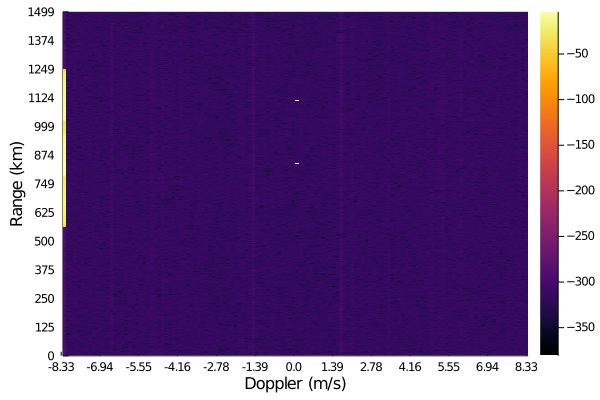

In [25]:
heatmap(20*log10.(abs.(range_doppler)), xlabel="Doppler (m/s)", ylabel="Range (km)", xticks=(LinRange(0,repetitions, 13), dopplerLabel), yticks=(LinRange(1,len,13), rangeLabel))

In [26]:
v = 0:(maxDop * 4);

r = ((c^2)/(8*fc)) ./ v;

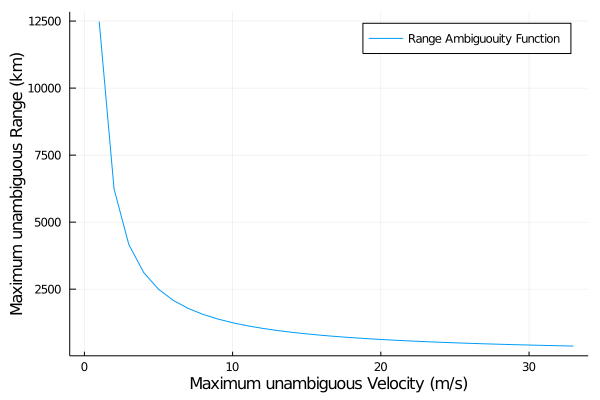

In [27]:
plot(v,r./1000, labels="Range Ambiguouity Function", xlabel="Maximum unambiguous Velocity (m/s)", ylabel="Maximum unambiguous Range (km)")